In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [6]:
#int(len(df)*0.8)

1007

In [35]:
# split the data into training and test sets (80% and 20%)
training_set = df.iloc[:int(len(df)*0.8), 1:2].values
test_set = df.iloc[int(len(df)*0.8):, 1:2].values

# LSTM Model with 4 Hidden Layers (lag of 1)

In [29]:
def scaling(timestep):
  # Feature Scaling
  sc = MinMaxScaler(feature_range = (0, 1))
  training_set_scaled = sc.fit_transform(training_set)
  # Creating a data structure with 60 time-steps and 1 output
  X_train = []
  y_train = []
  for i in range(timestep, len(training_set_scaled)):
      X_train.append(training_set_scaled[i-timestep:i, 0])
      y_train.append(training_set_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  return X_train, y_train

In [12]:
#x_train1, y_train1 = scaling(1)
#x_train7, y_train7 = scaling(7)
#x_train14, y_train14 = scaling(14)

In [13]:
#print(x_train1.shape)
#print(x_train7.shape)
#print(x_train14.shape)

(1006, 1, 1)
(1000, 7, 1)
(993, 14, 1)


In [30]:
def dev_model(units=50, dropout=0.2,batch_size=32,epochs=100):
    # build the model
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units))
    model.add(Dropout(dropout))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

    return model

In [31]:
timestep=1
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 8s 9ms/step - loss: 0.2671
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0624
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0306
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0210
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 11/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 12/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 13/100
32/32 [================

In [32]:
# Getting the predicted stock price of 2017
def predict(model,timestep):
  dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
  dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
  dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
  inputs = inputs.reshape(-1,1)
  sc = MinMaxScaler(feature_range = (0, 1))
  inputs = sc.fit_transform(inputs)
  X_test = []
  for i in range(timestep, np.int(len(df))-np.int(len(df)*0.8)+timestep):
    X_test.append(inputs[i-timestep:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print(X_test.shape)

  # Make Predictions using the test set
  predicted_stock_price = model.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  return predicted_stock_price

In [34]:
predicted_stock_price = predict(model,timestep)

(252, 1, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


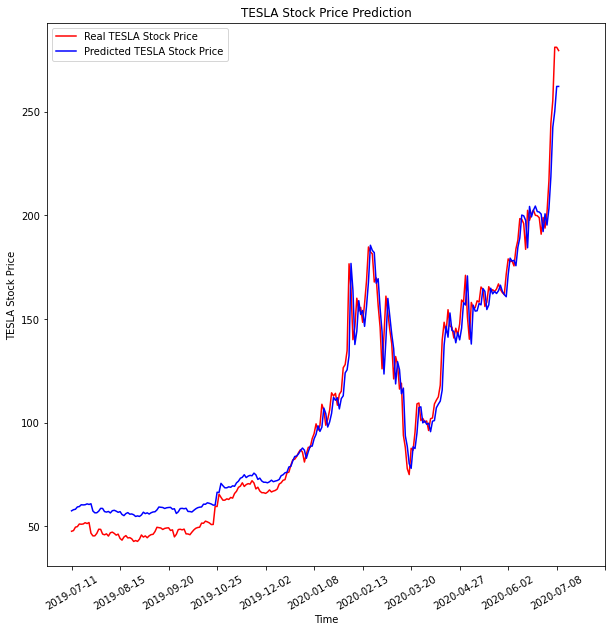

In [51]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM Model with 4 Hidden Layers (lag of 7)

In [52]:
timestep=7
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 9s 21ms/step - loss: 0.1017
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0183
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0089
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0091
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0079
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0087
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0080
Epoch 8/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0078
Epoch 9/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0085
Epoch 10/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0079
Epoch 11/100
32/32 [==============================] - 1s 23ms/step - loss: 0.0078
Epoch 12/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0071
Epoch 13/100
32/32 [=====

In [53]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 7, 1)


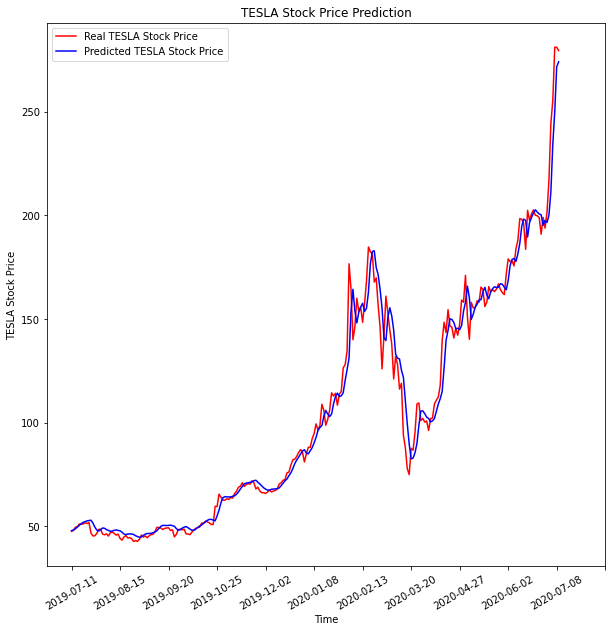

In [54]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM Model with 4 Hidden Layers (lag of 14)

In [55]:
timestep=14
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 10s 40ms/step - loss: 0.0704
Epoch 2/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0142
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0116
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0153
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0110
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.0104
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0096
Epoch 8/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0103
Epoch 9/100
32/32 [==============================] - 1s 36ms/step - loss: 0.0089
Epoch 10/100
32/32 [==============================] - 1s 36ms/step - loss: 0.0098
Epoch 11/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0090
Epoch 12/100
32/32 [==============================] - 1s 36ms/step - loss: 0.0106
Epoch 13/100
32/32 [====

In [56]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 14, 1)


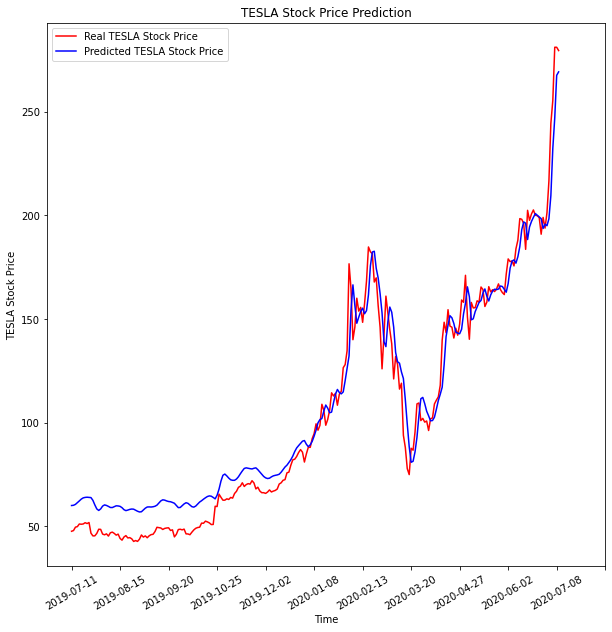

In [58]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM with 6 Hidden Layers (lag of 1)

In [59]:
def dev_model(units=50, dropout=0.2,batch_size=32,epochs=100):
    # build the model
    model = Sequential()
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a fifth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units, return_sequences = True))
    model.add(Dropout(dropout))
    # Adding a sixth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = units))
    model.add(Dropout(dropout))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

    return model

In [60]:
timestep=1
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 12s 10ms/step - loss: 0.2655
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0715
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0406
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0223
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0104
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0099
Epoch 8/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0075
Epoch 9/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 10/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0068
Epoch 11/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0058
Epoch 12/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0058
Epoch 13/100
32/32 [====

In [61]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 1, 1)


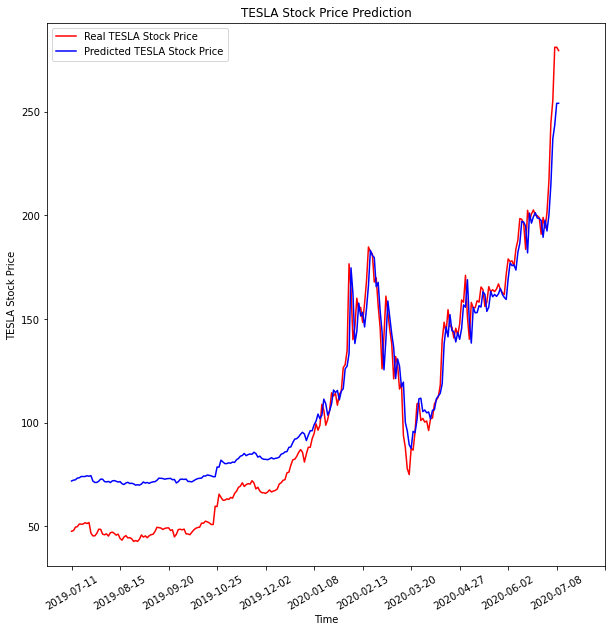

In [62]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM with 6 hidden layers (lag of 7)

In [65]:
timestep=7
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 18s 31ms/step - loss: 0.1247
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0307
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0115
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0100
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0093
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0090
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0098
Epoch 8/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0089
Epoch 9/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0093
Epoch 10/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0085
Epoch 11/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0089
Epoch 12/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0083
Epoch 13/100
32/32 [====

In [66]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 7, 1)


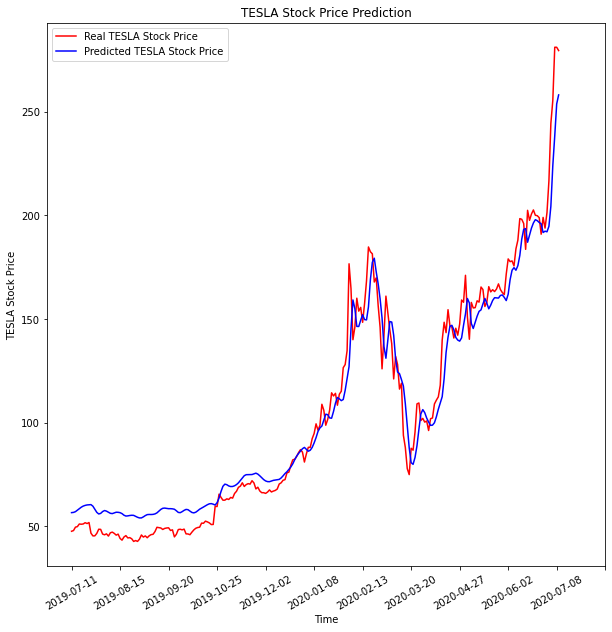

In [67]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM with 6 hidden layers (lag of 14)

In [68]:
timestep=14
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,32,100)

Epoch 1/100
32/32 [==============================] - 14s 54ms/step - loss: 0.0811
Epoch 2/100
32/32 [==============================] - 2s 56ms/step - loss: 0.0195
Epoch 3/100
32/32 [==============================] - 2s 58ms/step - loss: 0.0129
Epoch 4/100
32/32 [==============================] - 2s 59ms/step - loss: 0.0138
Epoch 5/100
32/32 [==============================] - 2s 56ms/step - loss: 0.0142
Epoch 6/100
32/32 [==============================] - 2s 56ms/step - loss: 0.0129
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.0120
Epoch 8/100
32/32 [==============================] - 2s 56ms/step - loss: 0.0115
Epoch 9/100
32/32 [==============================] - 2s 55ms/step - loss: 0.0154
Epoch 10/100
32/32 [==============================] - 2s 55ms/step - loss: 0.0119
Epoch 11/100
32/32 [==============================] - 2s 55ms/step - loss: 0.0107
Epoch 12/100
32/32 [==============================] - 2s 54ms/step - loss: 0.0108
Epoch 13/100
32/32 [====

In [69]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 14, 1)


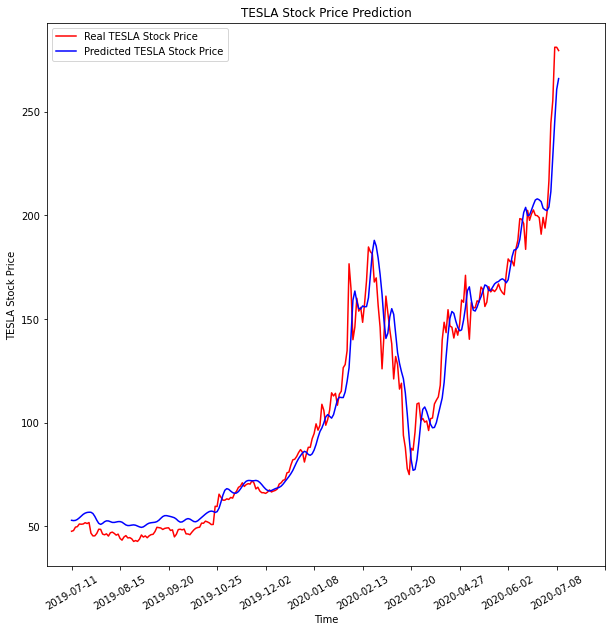

In [70]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM Model with 6 Hidden Layers (lag of 1) with Different Batchsize (64)

In [71]:
timestep=1
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,64,100)

Epoch 1/100
16/16 [==============================] - 11s 13ms/step - loss: 0.3094
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.2227
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0874
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0506
Epoch 5/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0444
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0343
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0251
Epoch 8/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 9/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 10/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0126
Epoch 11/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0106
Epoch 12/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 13/100
16/16 [====

In [72]:
predicted_stock_price = predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 1, 1)


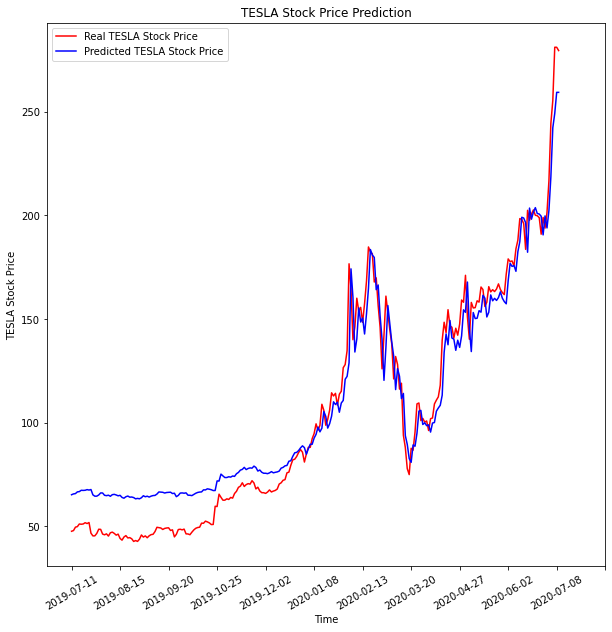

In [73]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# LSTM Model with 6 Hidden Layers (lag of 1) with Different Batchsize (128)

In [74]:
timestep=1
X_train,y_train=scaling(timestep)
model = dev_model(50,0.2,128,100)

Epoch 1/100
8/8 [==============================] - 11s 14ms/step - loss: 0.3259
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2921
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2500
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.1940
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1186
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0557
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0577
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0478
Epoch 9/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0479
Epoch 10/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0440
Epoch 11/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0405
Epoch 12/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0351
Epoch 13/100
8/8 [==============================

In [75]:
predicted_stock_price=predict(model,timestep)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


(252, 1, 1)


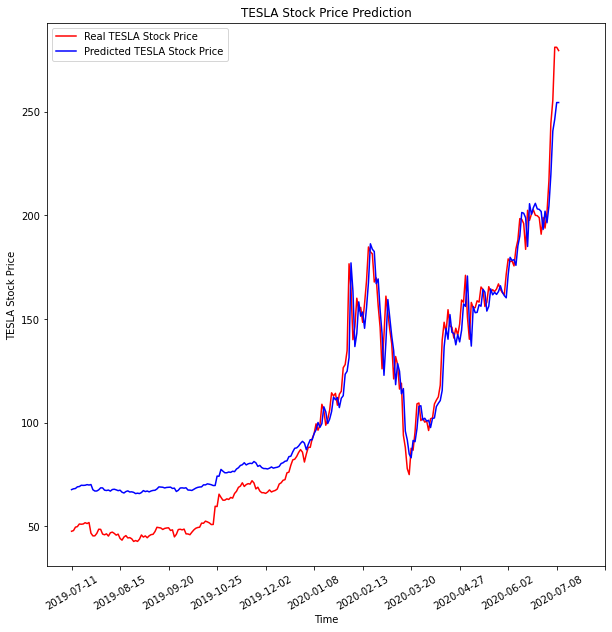

In [76]:
from matplotlib import figure
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
plt.figure(figsize=(10,10))
#visualising the results
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[int(len(df)*0.8):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
plt.xticks(np.arange(0, 300, 25))
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Prediction for future two weeks

In [83]:
from datetime import datetime
start_date = datetime(2020, 10, 1)
end_date = datetime(2020, 10, 15)
diff = (end_date - start_date).days
diff

14

In [84]:
# get the date of following two weeks
dates = df['Date']
last_date = '2020-10-1'
timestamp_list = pd.date_range(last_date, periods = diff).tolist()
datestring_list = [i.strftime("%Y-%m-%d") for i in timestamp_list] 
datestring_list
# delete weekends
index = [2,3,9,10]
to_del = object()
for ind in index:
    datestring_list[ind] = to_del
for i in index:
    datestring_list.remove(to_del)
datestring_list

['2020-10-01',
 '2020-10-02',
 '2020-10-05',
 '2020-10-06',
 '2020-10-07',
 '2020-10-08',
 '2020-10-09',
 '2020-10-12',
 '2020-10-13',
 '2020-10-14']

In [85]:
len(datestring_list)

10

In [96]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:int(len(df)*0.8), 1:2]
dataset_test = df.iloc[int(len(df)*0.8):, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(timestep, np.int(len(df))-np.int(len(df)*0.8)+timestep):
    X_test.append(inputs[i-1:i, 0])
print(len(X_test))
del X_test[0:len(X_test)-10]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

252
(10, 1, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [97]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

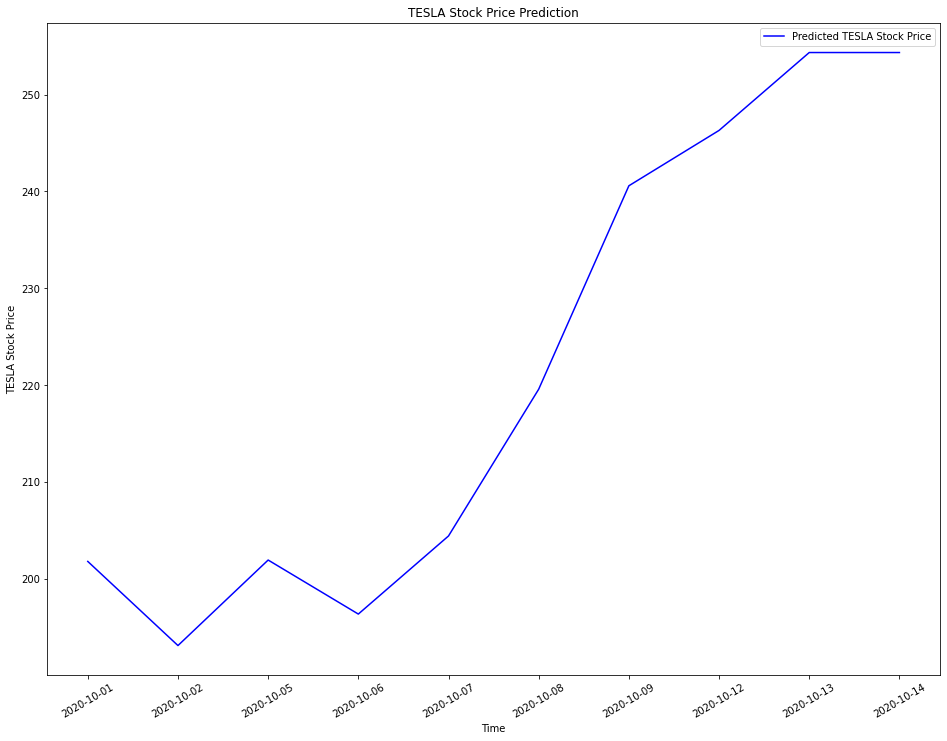

In [98]:
#visualising the results
plt.plot(datestring_list,predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,10))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure=plt.gcf()
figure.set_size_inches(16,12)
plt.xticks(rotation=30)
plt.legend()
plt.show()